<a href="https://colab.research.google.com/github/visiont3lab/deep-learning-course/blob/main/colab/Intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started With Pytorch for Deep Learning



* [PyTorch Computer Vision Cookbook](https://github.com/PacktPublishing/PyTorch-Computer-Vision-Cookbook)
* [Deep Learning Sample Code](https://github.com/PacktPublishing)

## Installation

* Local (Own Pc)

    Install [python 3.8](https://www.python.org/downloads/)

    ```
    pip3 install virtualenv
    virtualenv env
    source env/bin/activate # Linux - Mac
    source env/Scripts/activate # Windows
    pip install torch torchvision
    ```


* Google Colab

    ```
    pip3 install torch torchvision
    ```
These requirements should be arealdy satisied


In [3]:
# Verify installation
!pip list | grep torch

torch                         1.7.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.3.1         
torchvision                   0.8.2+cu101   


In [116]:
# Change runtime colab type to enable GPU
# Click on Runtime --> Select Change Runtime Type --> Select Hardware Accelarion GPU

import torch
import torchvision
print("Torch Version: ",torch.__version__)
print("Torch Vision Version:", torchvision.__version__)
print("Is Cuda available: ", torch.cuda.is_available())
print("Number of  Cuda device: ", torch.cuda.device_count())
print("Get Cuda Current device: ", torch.cuda.current_device())
print("Get Name of Cuda  device: ", torch.cuda.get_device_name(0))

Torch Version:  1.7.1+cu101
Torch Vision Version: 0.8.2+cu101
Is Cuda available:  True
Number of  Cuda device:  1
Get Cuda Current device:  0
Get Name of Cuda  device:  Tesla T4


## Pytorch: Tensors

> Tensor: n-dimensional array

* [Pytoch documentation](https://pytorch.org/docs/stable/index.html)
* [List of Pytorch Type](https://pytorch.org/docs/stable/tensors.html)

In [117]:
import torch
x = torch.ones(4,4)
print(x)
print("Shape: ", x.shape)
print("Type : ", x.dtype) # Torch default data type is torch.float32

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Shape:  torch.Size([4, 4])
Type :  torch.float32


In [118]:
# Specify tensor type
x = 2*torch.ones(1,3,3, dtype=torch.int8)
print(x)
print("Shape: ", x.shape)
print("Type : ", x.dtype)

tensor([[[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]]], dtype=torch.int8)
Shape:  torch.Size([1, 3, 3])
Type :  torch.int8


In [119]:
# Change tensor type
x = torch.rand(3, dtype=torch.float32) # random uniform 0-1
x = 5*x # Multiply by 5
print("Tensor: %s , Type: %s " % (x, x.dtype))
x = x.type(torch.uint8) # change data type to unit8
print("Tensor: %s , Type: %s " % (x, x.dtype))

Tensor: tensor([2.7060, 2.9286, 1.7063]) , Type: torch.float32 
Tensor: tensor([2, 2, 1], dtype=torch.uint8) , Type: torch.uint8 


In [120]:
# Tensor to numpy array
x = torch.sin( torch.rand(4) + 2*torch.rand(4) )
xnp = x.numpy()
print("Numpy Array: %s , Type: %s " % (xnp, xnp.dtype))

Numpy Array: [0.9927129  0.83238405 0.88557565 0.44139844] , Type: float32 


In [121]:
# Numpy array to tensor
import numpy as np
xnp = np.sin( np.random.rand(4) + 2*np.random.rand(4) ) # Float64 by default numpy
x = torch.from_numpy(xnp)
x = x.type(torch.float32)
print("Tensor: %s , Type: %s " % (x, x.dtype))

Tensor: tensor([0.7397, 0.8691, 0.9946, 0.7989]) , Type: torch.float32 


In [122]:
# Moving tensor bettwen cpu and cuda device
# If u do not specify the device the tensorf will be hosted by default on cpu
x = torch.tensor([[1,3,4.4,5.6]])
print("Tensor: %s , Type: %s ,Shape: %s, Device: %s" % (x.tolist(), x.dtype,x.shape,x.device))
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    x = x.to(device)
    print("Tensor: %s , Type: %s ,Shape: %s, Device: %s" % (x.tolist(), x.dtype,x.shape,x.device))


Tensor: [[1.0, 3.0, 4.400000095367432, 5.599999904632568]] , Type: torch.float32 ,Shape: torch.Size([1, 4]), Device: cpu
Tensor: [[1.0, 3.0, 4.400000095367432, 5.599999904632568]] , Type: torch.float32 ,Shape: torch.Size([1, 4]), Device: cuda:0


## Pytorch: Dataset tools

* [Torchvision Datasets](https://pytorch.org/vision/stable/datasets.html)
* [Pytorch transforms augmentation](https://pytorch.org/docs/stable/torchvision/transforms.html)

In [123]:
from torchvision import datasets

# Get Mnist Train Datasets inside folder dataset
train_data = datasets.MNIST("./dataset", train=True, download=True)

In [124]:
# Extract Train data
x_train, y_train = train_data.data, train_data.targets
print("Training Dataset")
print("Shape: %s , Type: %s " % (x_train.shape, x_train.dtype))
print("Shape: %s , Type: %s " % (y_train.shape, y_train.dtype))

Training Dataset
Shape: torch.Size([60000, 28, 28]) , Type: torch.uint8 
Shape: torch.Size([60000]) , Type: torch.int64 


In [125]:
# Get Mnist Validation Datasets inside folder dataset
val_data = datasets.MNIST("./dataset", train=False, download=True)
print(val_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test


In [126]:
# Extract Validation data
x_val, y_val = val_data.data, val_data.targets
print("Validation Dataset")
print("Shape: %s , Type: %s " % (x_val.shape, x_val.dtype))
print("Shape: %s , Type: %s " % (y_val.shape, y_val.dtype))

Validation Dataset
Shape: torch.Size([10000, 28, 28]) , Type: torch.uint8 
Shape: torch.Size([10000]) , Type: torch.int64 


In [127]:
# Modify tensor dimension
print("Shape x_train: ", x_train.shape)
print("Shape x_val: ", x_val.shape)
if (len(x_train.shape)==3):
    x_train=x_train.unsqueeze(1) # this nember specify where to  add new tensor
    x_val = x_val.unsqueeze(1)
print("Shape x_train: ", x_train.shape)
print("Shape x_val: ", x_val.shape)

Shape x_train:  torch.Size([60000, 28, 28])
Shape x_val:  torch.Size([10000, 28, 28])
Shape x_train:  torch.Size([60000, 1, 28, 28])
Shape x_val:  torch.Size([10000, 1, 28, 28])


Shape x_grid:  torch.Size([3, 104, 269])
Shape x_grid Resize:  (312, 807, 3)


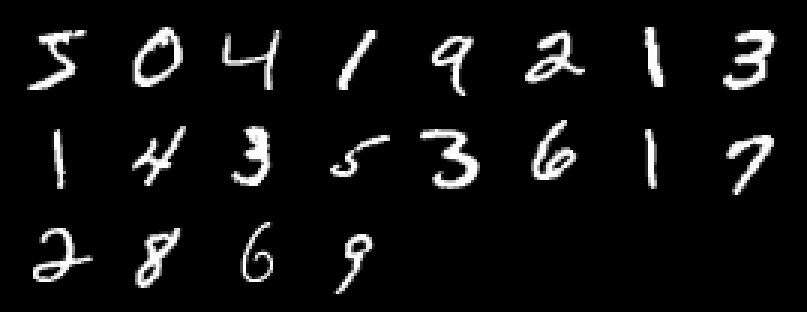

In [128]:
# Display Images
from torchvision import utils 
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# sets the backend of matplotlib to the 'inline' backend
%matplotlib inline 

def show_matplotlib(img):
    # img is a tensor!
    # Convert tensor to numpy array
    img_np = img.numpy()
    # Reshape image
    img_np = np.transpose(img_np, (1,2,0))
    # Display using matplotlib
    plt.imshow(img_np, interpolation="nearest") #,aspect='auto')
    plt.axis('off')

def show_cv2(img):
    # img is a tensor!
    # Convert tensor to numpy array
    img_np = img.numpy()
    # Reshape image
    img_np = np.transpose(img_np, (1,2,0))
    # Display using opencv
    scale_percent = 300 # percent of original size
    width = int(img_np.shape[1] * scale_percent / 100)
    height = int(img_np.shape[0] * scale_percent / 100)
    dim = (width, height)  
    img_np = cv2.resize(img_np, dim, interpolation = cv2.INTER_AREA)
    print("Shape x_grid Resize: ", img_np.shape)
    cv2_imshow(img_np)

# Let's create a grid image that contains 40 images of the train dataset
x_grid = utils.make_grid(x_train[:20], nrow=8, padding=5)
print("Shape x_grid: ", x_grid.shape)
#show_matplotlib(x_grid)
show_cv2(x_grid)

Shape:  torch.Size([28, 28])
Transformed Shape:  (1, 28, 28)


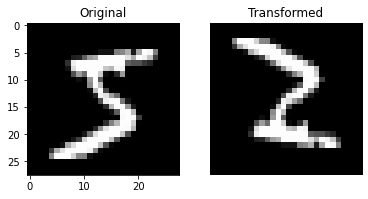

In [129]:
# Data transformation 
# Pytorch transform: https://pytorch.org/docs/stable/torchvision/transforms.html
# Let's modify images to create some augmented ones
from torchvision import datasets
from torchvision import transforms
import numpy as np
import cv2
import torch
from torchvision import utils 
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

# Get Mnist Train Datasets inside folder dataset
train_data = datasets.MNIST("./dataset", train=True, download=True)
x_train, y_train = train_data.data, train_data.targets
if (len(x_train.shape)==3):
    x_train=x_train.unsqueeze(1) # this nember specify where to  add new tensor

# Transformation applied to an Image
data_transform = transforms.Compose([
                                    transforms.ToPILImage(),  # Tensor of Numpy array to Pillow
                                    #transforms.RandomHorizontalFlip(p=1), # Pillow transformation
                                    transforms.RandomVerticalFlip(p=1), # Pillow transformation
                                    transforms.ToTensor(),          # Pillow to tensor
                            ])

img = x_train[0][0] # Pillow images (size)
print("Shape: ", img.shape) # Black and white image
img_tr = data_transform(img).numpy()  # range 0-1
print("Transformed Shape: ", img_tr.shape)

# Display images
#cv2_imshow(img)
#cv2_imshow(img_tr[0]*255)
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(img_tr[0], cmap="gray")
plt.title("Transformed")
plt.axis("off")
plt.show()

In [ ]:
# Wrapping Tensors into dataset
from torchvision import datasets
from torchvision import transforms
import numpy as np
import cv2
import torch
from torchvision import utils 
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
from torch.utils.data import TensorDataset,Dataset

class CustomTensorDataset(Dataset):

    def __init__(self, x,y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __getitem__(self, index):
        x = self.x[index]
        if self.transform:
            x = 255*self.transform(x)
        y = self.y[index]
        return x, y

    def __len__(self):
        return self.x.shape[0]


# Transformation
# Transformation applied to an Image
data_transform = transforms.Compose([
                                    transforms.ToPILImage(),  # Tensor of Numpy array to Pillow
                                    transforms.RandomApply( 
                                        torch.nn.ModuleList([
                                            transforms.RandomAffine((-10,10), translate=(0.1,0.2), scale=(0.5,1.3)),
                                            transforms.ColorJitter(brightness=(0.3,2), contrast=(0.9,1.1)),
                                        ]),
                                        p=0.5),
                                    #transforms.RandomHorizontalFlip(p=1), # Pillow transformation
                                    #transforms.RandomVerticalFlip(p=1), # Pillow transformation
                                    transforms.ToTensor(),          # Pillow to tensor (scale 0-1)
                            ])
# Loading data
train_data = datasets.MNIST("./dataset", train=True, download=True) #,transform=data_transform) # This transform will only be appluied on data loader
val_data = datasets.MNIST("./dataset", train=False, download=True) #,transform=data_transform)
x_train, y_train = train_data.data, train_data.targets
x_val, y_val = val_data.data, val_data.targets

# Add extra dimension (Preprocessing)
if (len(x_train.shape)==3):
    x_train=x_train.unsqueeze(1) 
if (len(x_val.shape)==3):
    x_val=x_val.unsqueeze(1) 

# Create a Tensor dataset
#train_ds = TensorDataset(x_train, y_train)
#val_ds = TensorDataset(x_val, y_val)
train_ds = CustomTensorDataset(x_train, y_train,data_transform)
val_ds = CustomTensorDataset(x_val, y_val,data_transform)

# Visualization Tensor Dataset
i = 0
for x,y in train_ds:
    print("Y = ", y.item())
    #print("X shape: ", x[0].shape)
    cv2_imshow(x[0].numpy())
    i=i+1
    if i>10:
        break

In [ ]:
# Creating data Loader
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

i = 0
for xb,yb in train_dl:
    #print(xb[0].dtype)
    #print(xb[0].min())
    #print(xb[0].max())
    #print(yb.shape)
    print(yb[2].item())
    cv2_imshow(xb[2][0].numpy())
    i=i+1
    if (i>10):
        break

# Pytorch: Neural Network